**参数 说明**

1. penalty

可以输⼊"l1"或"l2"来指定使⽤哪⼀种正则化⽅式，不填写默认"l2"。注意，若选择"l1"正则化，参数solver仅能够使⽤求解⽅式”liblinear"和"saga“，若使
⽤“l2”正则化，参数solver中所有的求解⽅式都可以使⽤。

2. C

C正则化强度的倒数，必须是⼀个⼤于0的浮点数，不填写默认1.0，即默认正则项与损失函数的⽐值是1：1。C越⼩，损失函数会越⼩，模型对损失函数的惩罚越重，正则化的效⼒越强，参数 会逐渐被压缩得越来越⼩。

L1正则化和L2正则化虽然都可以控制过拟合，但它们的效果并不相同。当正则化强度逐渐增⼤（即C逐渐变⼩），参数 的取值会逐渐变⼩，但L1正则化会将参数压缩为0，L2正则化只会让参数尽量⼩，不会取到0。

L1正则化在逐渐加强的过程中，携带信息量⼩的、对模型贡献不⼤的特征的参数，会⽐携带⼤量信息
的、对模型有巨⼤贡献的特征的参数更快地变成0，所以L1正则化本质是⼀个特征选择的过程，掌管了参数的“稀疏性”。L1正则化越强，参数向量中就越多的参数为0，参数就越稀疏，选出来的特征就越少，以此来防⽌过拟合。因此，如果特征量很⼤，数据维度很⾼，我们会倾向于使⽤L1正则化。由于L1正则化的这个性质，逻辑回归的特征选择可以由Embedded嵌⼊法来完成。

L2正则化在加强的过程中，会尽量让每个特征对模型都有⼀些⼩的贡献，但携带信息少，对模型贡献不⼤的特征的参数会⾮常接近于0。通常来说，如果我们的主要⽬的只是为了防⽌过拟合，选择L2正则化就⾜够了。但是如果选择L2正则化后还是过拟合，模型在未知数据集上的效果表现很差，就可以考虑L1正则化。

3. 重要参数 迭代次数 max_iter

梯度下降来求解求解能够让损失函数最⼩化的w值

### 导入库

In [1]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = load_breast_cancer()
X = data.data
y = data.target

In [2]:
data.data.shape

(569, 30)

### penalty

In [3]:
lr1 = LR(penalty='l1',solver = 'liblinear',C = 0.5,max_iter=1000)
lr2 = LR(penalty='l2',solver='liblinear',C=0.5,max_iter=1000)

In [14]:
lr1.fit(X,y)
lr1.coef_

array([[ 3.98676208,  0.03141249, -0.13525907, -0.0161942 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50349878,  0.        , -0.07122129,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24527963, -0.12833473, -0.01443275,  0.        ,
         0.        , -2.055113  ,  0.        ,  0.        ,  0.        ]])

In [15]:
lr2.fit(X,y)
lr2.coef_

array([[ 1.61542371e+00,  1.02248246e-01,  4.76325278e-02,
        -4.41770420e-03, -9.40455763e-02, -3.01374496e-01,
        -4.55801506e-01, -2.22065119e-01, -1.35379264e-01,
        -1.93837969e-02,  1.64802418e-02,  8.83843487e-01,
         1.21607733e-01, -9.48332435e-02, -9.79370778e-03,
        -2.39515093e-02, -5.73477868e-02, -2.69925141e-02,
        -2.77193181e-02,  1.62862353e-04,  1.26656807e+00,
        -3.01747441e-01, -1.73000457e-01, -2.21944066e-02,
        -1.72994079e-01, -8.79114209e-01, -1.16291700e+00,
        -4.27104639e-01, -4.19741038e-01, -8.69725697e-02]])

### C

In [16]:
l1 = []
l2 = []
l1test = []
l2test = []
Xtrain, Xtest, Ytrain, Ytest =train_test_split(X,y,test_size=0.3,random_state=420)

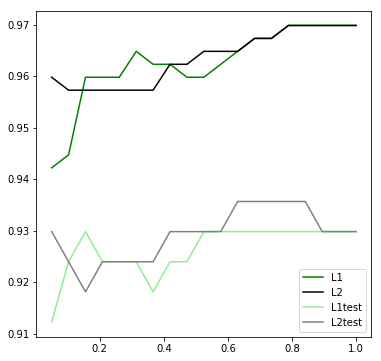

In [17]:
for i in np.linspace(0.05,1,19):
    lr1 = LR(penalty='l1',solver = 'liblinear',C =i,max_iter=1000)
    lr2 = LR(penalty='l2',solver='liblinear',C=i,max_iter=1000)
    
    lr1 = lr1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lr1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lr1.predict(Xtest),Ytest))
    
    lr2 = lr2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lr2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lr2.predict(Xtest),Ytest))
    
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]
plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4) 
plt.show()

In [18]:
lr1 = LR(penalty='l1',solver = 'liblinear',C = 0.8,max_iter=1000)
lr2 = LR(penalty='l2',solver='liblinear',C=0.8,max_iter=1000)
lr1 = lr1.fit(Xtrain,Ytrain)
lr1.score(Xtest,Ytest)

0.9298245614035088

In [19]:
lr2 = lr2.fit(Xtrain,Ytrain)
lr2.score(Xtest,Ytest)

0.935672514619883

### max_iter

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


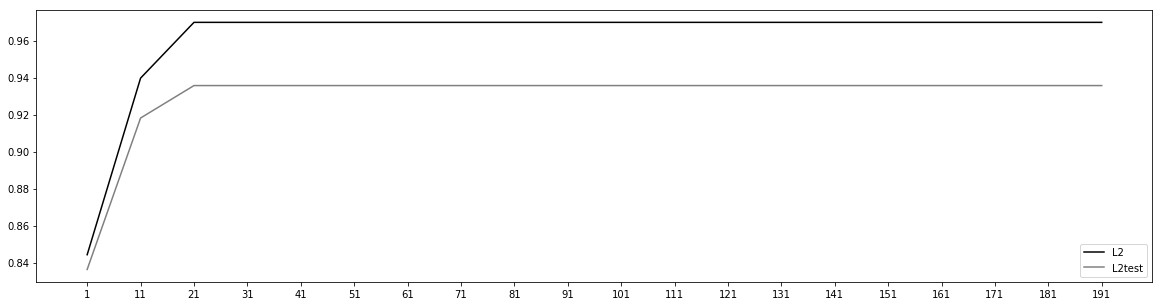

In [21]:
l2 = []
l2test = []

for i in np.arange(1,201,10):
    lr2 = LR(penalty='l2',solver='liblinear',C=0.8,max_iter=i)
    lr2 = lr2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lr2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lr2.predict(Xtest),Ytest))
    
graph = [l2,l2test]
color = ["black","gray"]
label = ["L2","L2test"]
plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()